In [981]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [983]:
df = sns.load_dataset('titanic')
df.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

In [984]:
df = df.drop(['class', 'alive','who','embarked','deck'] ,axis=1)
df.head(3)

survived  pclass     sex   age  sibsp  parch     fare  adult_male  \
0         0       3    male  22.0      1      0   7.2500        True   
1         1       1  female  38.0      1      0  71.2833       False   
2         1       3  female  26.0      0      0   7.9250       False   

   embark_town  alone  
0  Southampton  False  
1    Cherbourg  False  
2  Southampton   True

In [987]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [989]:
sns.countplot(x ='survived', data =df ,palette='pastel');

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21436\2386019110.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='survived', data =df ,palette='pastel');


In [990]:
df.survived.value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [993]:
sns.countplot(x='pclass' , data=df ,palette='pastel')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21436\1795587244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass' , data=df ,palette='pastel')


<Axes: xlabel='pclass', ylabel='count'>

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21436\4256054238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex' , data=df ,palette='pastel')


<Axes: xlabel='sex', ylabel='count'>

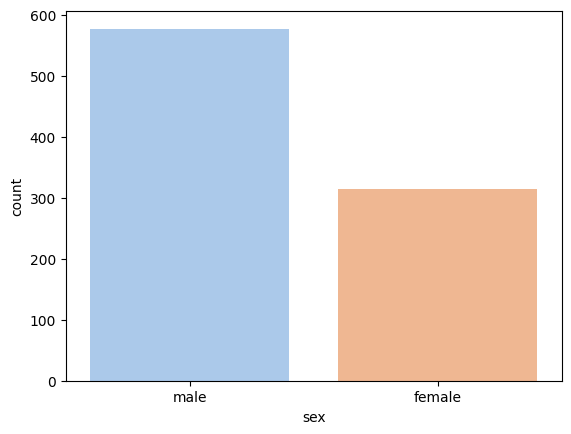

In [994]:
sns.countplot(x='sex' , data=df ,palette='pastel')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21436\3751430849.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sibsp' , data=df ,palette='pastel')


<Axes: xlabel='sibsp', ylabel='count'>

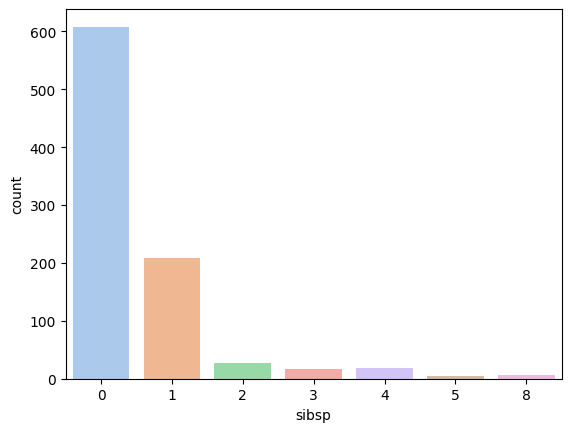

In [996]:
sns.countplot(x='sibsp' , data=df ,palette='pastel')

In [998]:
sns.boxenplot(y = 'fare',data = df)

<Axes: ylabel='fare'>

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21436\2870872139.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='adult_male' , data=df ,palette='pastel')


<Axes: xlabel='adult_male', ylabel='count'>

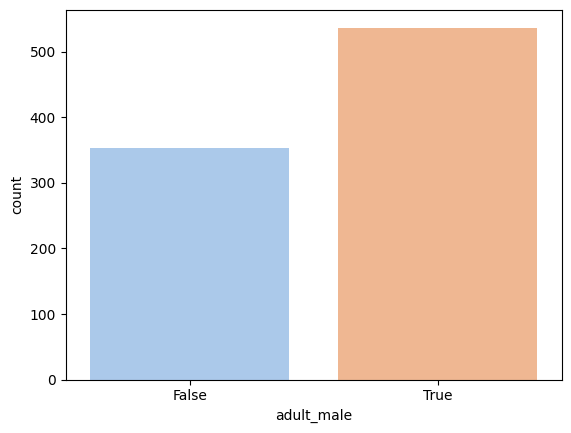

In [999]:
sns.countplot(x='adult_male' , data=df ,palette='pastel')

In [1001]:
from ydata_profiling import ProfileReport

In [1002]:
profile = ProfileReport(df, title="Rapport Exploratoire", explorative=True)


In [1004]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1006]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [1008]:
#les valeur manquantes 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [1010]:
# on peut pas supprimer les valeurs manquantes car ils représentent 19%
df.fillna(value={'age' : df.age.mean()} , inplace=True)


In [1011]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    2
alone          0
dtype: int64

In [1012]:
df.age.std()
#

13.002015226002884

On remarque que la variance a pas trop changé donc le remplacement est bon

In [1014]:
df.fillna(value={'embark_town' : 'Southampton'} , inplace=True)

In [1015]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [1016]:
def finding_outlieres(data, variable_name) :
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    upper = data[variable_name].quantile(0.75) + 1.5 * iqr
    lower =  data[variable_name].quantile(0.25) - 1.5 * iqr
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [1017]:
finding_outlieres(df,'fare').sort_values('fare')

survived  pclass     sex        age  sibsp  parch      fare  adult_male  \
336         0       1    male  29.000000      1      0   66.6000        True   
151         1       1  female  22.000000      1      0   66.6000       False   
369         1       1  female  24.000000      0      0   69.3000       False   
641         1       1  female  24.000000      0      0   69.3000       False   
846         0       3    male  29.699118      8      2   69.5500        True   
..        ...     ...     ...        ...    ...    ...       ...         ...   
27          0       1    male  19.000000      3      2  263.0000        True   
341         1       1  female  24.000000      3      2  263.0000       False   
679         1       1    male  36.000000      0      1  512.3292        True   
737         1       1    male  35.000000      0      0  512.3292        True   
258         1       1  female  35.000000      0      0  512.3292       False   

     embark_town  alone  
336  Southampton  False  
151  Southampton  False  
369    Cherbourg   True  
641    Cherbourg   True  
846  Southampton  False  
..           ...    ...  
27   Southampton  False  
341  Southampton  False  
679    Cherbourg  False  
737    Cherbourg   True  
258    Cherbourg   True  

[116 rows x 10 columns]

In [1018]:
iqrfare = (df.fare.quantile(0.75) - df.fare.quantile(0.25))
df.loc[(finding_outlieres(df,'fare').index,'fare')] = df.fare.quantile(0.75) + 1.5 * iqrfare

In [1019]:
sns.boxenplot(y = 'fare', data=df)

<Axes: ylabel='fare'>

In [1020]:
finding_outlieres(df,'age').sort_values('age')

survived  pclass     sex    age  sibsp  parch     fare  adult_male  \
803         1       3    male   0.42      0      1   8.5167       False   
755         1       2    male   0.67      1      1  14.5000       False   
469         1       3  female   0.75      2      1  19.2583       False   
644         1       3  female   0.75      2      1  19.2583       False   
831         1       2    male   0.83      1      1  18.7500       False   
..        ...     ...     ...    ...    ...    ...      ...         ...   
116         0       3    male  70.50      0      0   7.7500        True   
96          0       1    male  71.00      0      0  34.6542        True   
493         0       1    male  71.00      0      0  49.5042        True   
851         0       3    male  74.00      0      0   7.7750        True   
630         1       1    male  80.00      0      0  30.0000        True   

     embark_town  alone  
803    Cherbourg  False  
755  Southampton  False  
469    Cherbourg  False  
644    Cherbourg  False  
831  Southampton  False  
..           ...    ...  
116   Queenstown   True  
96     Cherbourg   True  
493    Cherbourg   True  
851  Southampton   True  
630  Southampton   True  

[66 rows x 10 columns]

In [1021]:
iqrage = (df.age.quantile(0.75) - df.age.quantile(0.25)) 

In [1022]:
df.loc[df['age'] < df['age'].quantile(0.25) - 1.5 * iqrage, 'age'] =  df['age'].quantile(0.25) - 1.5 * iqrage
df.loc[df['age'] > df['age'].quantile(0.75) + 1.5 * iqrage, 'age'] =  df['age'].quantile(0.75) + 1.5 * iqrage


In [1023]:
finding_outlieres(df,'age').sort_values('age')

Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, adult_male, embark_town, alone]
Index: []

In [1024]:
sns.boxenplot(y = 'age', data=df)

<Axes: ylabel='age'>

In [1025]:
# préparation des données 
df['alone'] = df['alone'].astype('int')
df.sex = df.sex.replace({'female' : 0 , 'male' : 1})
df['adult_male'] = df['adult_male'].astype('int')
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21436\1001436789.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.sex = df.sex.replace({'female' : 0 , 'male' : 1})


survived  pclass  sex        age  sibsp  parch     fare  adult_male  \
0           0       3    1  22.000000      1      0   7.2500           1   
1           1       1    0  38.000000      1      0  65.6344           0   
2           1       3    0  26.000000      0      0   7.9250           0   
3           1       1    0  35.000000      1      0  53.1000           0   
4           0       3    1  35.000000      0      0   8.0500           1   
..        ...     ...  ...        ...    ...    ...      ...         ...   
886         0       2    1  27.000000      0      0  13.0000           1   
887         1       1    0  19.000000      0      0  30.0000           0   
888         0       3    0  29.699118      1      2  23.4500           0   
889         1       1    1  26.000000      0      0  30.0000           1   
890         0       3    1  32.000000      0      0   7.7500           1   

     embark_town  alone  
0    Southampton      0  
1      Cherbourg      0  
2    Southampton      1  
3    Southampton      0  
4    Southampton      1  
..           ...    ...  
886  Southampton      1  
887  Southampton      1  
888  Southampton      0  
889    Cherbourg      1  
890   Queenstown      1  

[891 rows x 10 columns]

In [1026]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [1027]:
emark_dummies = pd.get_dummies(df['embark_town'] , drop_first=True)
df.embark_town = df.embark_town.replace({False : 0 , True : 1})
emark_dummies

Queenstown  Southampton
0         False         True
1         False        False
2         False         True
3         False         True
4         False         True
..          ...          ...
886       False         True
887       False         True
888       False         True
889       False        False
890        True        False

[891 rows x 2 columns]

In [1028]:
df = pd.concat([df,emark_dummies] , axis=1)
del df['embark_town']
df

survived  pclass  sex        age  sibsp  parch     fare  adult_male  \
0           0       3    1  22.000000      1      0   7.2500           1   
1           1       1    0  38.000000      1      0  65.6344           0   
2           1       3    0  26.000000      0      0   7.9250           0   
3           1       1    0  35.000000      1      0  53.1000           0   
4           0       3    1  35.000000      0      0   8.0500           1   
..        ...     ...  ...        ...    ...    ...      ...         ...   
886         0       2    1  27.000000      0      0  13.0000           1   
887         1       1    0  19.000000      0      0  30.0000           0   
888         0       3    0  29.699118      1      2  23.4500           0   
889         1       1    1  26.000000      0      0  30.0000           1   
890         0       3    1  32.000000      0      0   7.7500           1   

     alone  Queenstown  Southampton  
0        0       False         True  
1        0       False        False  
2        1       False         True  
3        0       False         True  
4        1       False         True  
..     ...         ...          ...  
886      1       False         True  
887      1       False         True  
888      0       False         True  
889      1       False        False  
890      1        True        False  

[891 rows x 11 columns]

In [1029]:
df['Queenstown'] = df['Queenstown'].map({True: 1, False: 0})
df['Southampton'] = df['Southampton'].map({True: 1, False: 0})
df

survived  pclass  sex        age  sibsp  parch     fare  adult_male  \
0           0       3    1  22.000000      1      0   7.2500           1   
1           1       1    0  38.000000      1      0  65.6344           0   
2           1       3    0  26.000000      0      0   7.9250           0   
3           1       1    0  35.000000      1      0  53.1000           0   
4           0       3    1  35.000000      0      0   8.0500           1   
..        ...     ...  ...        ...    ...    ...      ...         ...   
886         0       2    1  27.000000      0      0  13.0000           1   
887         1       1    0  19.000000      0      0  30.0000           0   
888         0       3    0  29.699118      1      2  23.4500           0   
889         1       1    1  26.000000      0      0  30.0000           1   
890         0       3    1  32.000000      0      0   7.7500           1   

     alone  Queenstown  Southampton  
0        0           0            1  
1        0           0            0  
2        1           0            1  
3        0           0            1  
4        1           0            1  
..     ...         ...          ...  
886      1           0            1  
887      1           0            1  
888      0           0            1  
889      1           0            0  
890      1           1            0  

[891 rows x 11 columns]

In [1030]:
df['family'] = df['sibsp'] + df['parch']

In [1031]:
df.drop(['sibsp','parch'] , axis = 1 , inplace=True)
df

survived  pclass  sex        age     fare  adult_male  alone  Queenstown  \
0           0       3    1  22.000000   7.2500           1      0           0   
1           1       1    0  38.000000  65.6344           0      0           0   
2           1       3    0  26.000000   7.9250           0      1           0   
3           1       1    0  35.000000  53.1000           0      0           0   
4           0       3    1  35.000000   8.0500           1      1           0   
..        ...     ...  ...        ...      ...         ...    ...         ...   
886         0       2    1  27.000000  13.0000           1      1           0   
887         1       1    0  19.000000  30.0000           0      1           0   
888         0       3    0  29.699118  23.4500           0      0           0   
889         1       1    1  26.000000  30.0000           1      1           0   
890         0       3    1  32.000000   7.7500           1      1           1   

     Southampton  family  
0              1       1  
1              0       1  
2              1       0  
3              1       1  
4              1       0  
..           ...     ...  
886            1       0  
887            1       0  
888            1       3  
889            0       0  
890            0       0  

[891 rows x 10 columns]

In [1032]:
#division des données  
from  sklearn.model_selection import train_test_split
X = df.drop('survived',axis=1)
y = df['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size= 0.4, random_state=44 , stratify=y)

In [1033]:
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test , test_size= 0.5, random_state=44 , stratify=y_test)

In [1034]:
#il faut préserver les propotion des données 
y.value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [1035]:
y_train.value_counts(normalize=True)

survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64

In [1036]:
y_val.value_counts(normalize=True)

survived
0    0.617978
1    0.382022
Name: proportion, dtype: float64

In [1037]:
y_test.value_counts(normalize=True)

survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64

In [1038]:
# Normalisation 

In [1039]:
#Méthode de sur-échantillonage  

from sklearn.utils import resample 

X2 = X_train
X2['survived'] = y_train.values
X2.head()

pclass  sex   age     fare  adult_male  alone  Queenstown  Southampton  \
110       1    1  47.0  52.0000           1      1           0            1   
194       1    0  44.0  27.7208           0      1           0            0   
855       3    0  18.0   9.3500           0      0           0            1   
363       3    1  35.0   7.0500           1      1           0            1   
771       3    1  48.0   7.8542           1      1           0            1   

     family  survived  
110       0         0  
194       0         1  
855       1         1  
363       0         0  
771       0         0

In [1040]:
minority = X2[X2.survived == 1]
majority = X2[X2.survived == 0]

In [1041]:
majority.shape

(329, 10)

In [1042]:
minority.shape

(205, 10)

In [1043]:
 minority_up_simple = resample(minority,replace=True,n_samples= len(majority))
minority_up_simple.shape

(329, 10)

In [1044]:
upsampled = pd.concat([majority,minority_up_simple])

In [1045]:
upsampled.survived.value_counts(normalize=True)

survived
0    0.5
1    0.5
Name: proportion, dtype: float64

In [1046]:
X_train_up = upsampled.drop(['survived'],axis=1)
y_train_up = upsampled['survived']

In [1047]:
# modélisation
# selection des variables importantes 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=44)
rf.fit(X_train_up,y_train_up)
accuracy_score(y_val,rf.predict(X_val))

0.7865168539325843

In [1048]:
print(X_train_up.columns)
print(rf.feature_importances_)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.08723895 0.15918347 0.20290163 0.25613695 0.17842515 0.01879351
 0.01052702 0.02588057 0.06091275]


In [1049]:
vars_imprt = pd.Series(rf.feature_importances_,index=X_train_up.columns).sort_values(ascending=False)

In [1050]:
vars_imprt

fare           0.256137
age            0.202902
adult_male     0.178425
sex            0.159183
pclass         0.087239
family         0.060913
Southampton    0.025881
alone          0.018794
Queenstown     0.010527
dtype: float64

<Axes: xlabel='None', ylabel='None'>

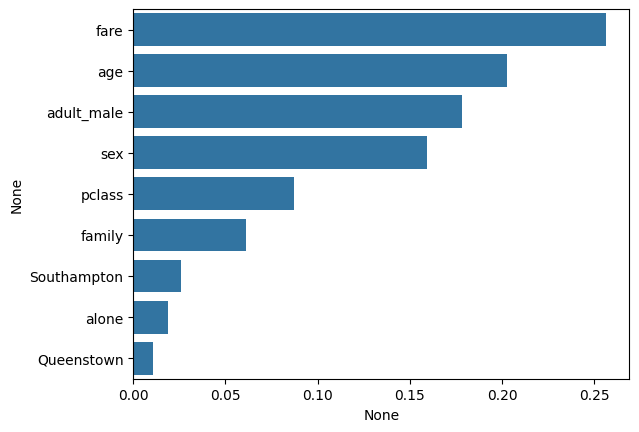

In [1051]:
sns.barplot(x = vars_imprt , y=vars_imprt.index)

In [1052]:
var_non_imp = ['Queenstown']

In [1053]:
X_train_up = X_train_up.drop(var_non_imp,axis=1)
X_val = X_val.drop(var_non_imp,axis=1)
X_test = X_test.drop(var_non_imp,axis=1)

In [1054]:
# Regression logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=44,max_iter=500)
lr_hyp = {"C" : [0.001,0.01,0.1,1,1,100,500]}
lr_cv = GridSearchCV(lr,lr_hyp,cv = 5)
lr_cv.fit(X_train_up,y_train_up)
print(lr_cv.best_score_)
print(lr_cv.best_estimator_)

0.8176035160767986
LogisticRegression(C=100, max_iter=500, random_state=44)


In [1060]:
#forret aléatoire 
RF = RandomForestClassifier(random_state=44)
#chercher le nombre ideale d'arbre 
RF_hyp = {'n_estimators' : [5,10,20,50,100,200],'max_depth' : [None,2,5,10,15,20]}
RF_cv = GridSearchCV(RF,RF_hyp,cv=5)
RF_cv.fit(X_train_up,y_train_up)
print(RF_cv.best_score_)
print(RF_cv.best_estimator_)

0.8876243349525792
RandomForestClassifier(n_estimators=10, random_state=44)


In [1069]:
#SVM 
from sklearn.svm import SVC 
sv = SVC(random_state=44)
sv_hyp = {"C" : [0.1,1,10] ,'kernel' : ['linear' , 'rbf']}
svm_cv = GridSearchCV(sv , sv_hyp,cv=5)
svm_cv.fit(X_train_up,y_train_up)
print(svm_cv.best_score_)
print(svm_cv.best_estimator_)

0.8084432107332871
SVC(C=0.1, kernel='linear', random_state=44)


In [1071]:
#Baggin Clasifier 
from sklearn.ensemble import BaggingClassifier 
bc = BaggingClassifier(random_state=44)
bc_hyp = {'n_estimators' : [5,10,20,50,100,200]}
bc_cv = GridSearchCV(bc,bc_hyp,cv=5)
bc_cv.fit(X_train_up,y_train_up)
print(bc_cv.best_score_)
print(bc_cv.best_estimator_)

0.8921350913717326
BaggingClassifier(n_estimators=50, random_state=44)


In [1081]:
# Evaluation des performance et choix 
def model_evaluation(model,features,labels) :
    pred = model.predict(features)
    score = accuracy_score(y_val,pred)
    print('Score global de model : ' , round(score,4))

In [1085]:
models = [lr_cv.best_estimator_,RF_cv.best_estimator_,svm_cv.best_estimator_,bc_cv.best_estimator_]
for model in models :
    print('model  ' + str(model))
    model_evaluation(model , X_val,y_val)
    print('-' * 10)
    

model  LogisticRegression(C=100, max_iter=500, random_state=44)
Score global de model :  0.7809
----------
model  RandomForestClassifier(n_estimators=10, random_state=44)
Score global de model :  0.7528
----------
model  SVC(C=0.1, kernel='linear', random_state=44)
Score global de model :  0.7753
----------
model  BaggingClassifier(n_estimators=50, random_state=44)
Score global de model :  0.7809
----------


In [1089]:
#Performance du meilleur model sur les données de test 
accuracy_score(y_test,lr_cv.best_estimator_.predict(X_test))

0.770949720670391

In [1099]:
accuracy_score(y_test,bc_cv.best_estimator_.predict(X_test))

0.7821229050279329

In [ ]:
# on remarque que le model de Bagging Classifier est le milleur 